In [58]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 

In [59]:
#loading the data from csv file to pandas dataframe
car_dataset=pd.read_csv(r"C:\Users\lenovo\Desktop\car prediction\CAR DETAILS FROM CAR DEKHO.csv")

In [60]:
#inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [61]:
#checking the number of rows and column
car_dataset.shape

(4340, 8)

In [62]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [63]:
#checking the number of missing value
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [64]:
#checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64


In [73]:
#encoding "Fuel" column
car_dataset.replace({'fuel':{'Diesel':0 ,'Petrol':1 ,'CNG': 2 ,'LPG':3 ,'Electric': 4}},inplace=True)

#encoding "Seller_Type" Column
car_dataset.replace({'seller_type':{'Individual':0,'Dealer': 1 ,'Trustmark Dealer':2}},inplace=True)

#encoding "Transmission" Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [74]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,Second Owner


In [75]:
X=car_dataset.drop(['name','selling_price','owner'],axis=1)
Y=car_dataset['selling_price']

In [76]:
print(X)

      year  km_driven  fuel  seller_type  transmission
0     2007      70000     1            0             0
1     2007      50000     1            0             0
2     2012     100000     0            0             0
3     2017      46000     1            0             0
4     2014     141000     0            0             0
...    ...        ...   ...          ...           ...
4335  2014      80000     0            0             0
4336  2014      80000     0            0             0
4337  2009      83000     1            0             0
4338  2016      90000     0            0             0
4339  2016      40000     1            0             0

[4340 rows x 5 columns]


In [77]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [79]:
#loading the linear regression model
lin_reg_model=LinearRegression()

In [80]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [81]:
#prediction on Training data
training_data_prediction=lin_reg_model.predict(X_train)

In [82]:
#R square Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error :",error_score)

R squared Error : 0.4429514238592476


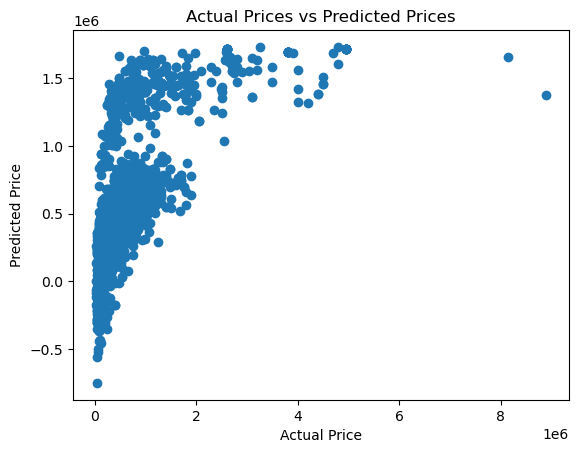

In [84]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [86]:
#loading the linear regression model
lass_reg_model=Lasso()

In [87]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [88]:
#Prediction on Training Data
training_data_prediction=lass_reg_model.predict(X_train)

In [89]:
#R squared Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.4429514238116258


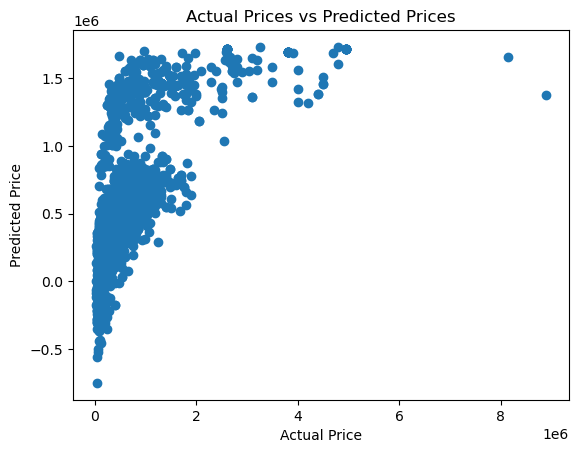

In [91]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()